Question 1 : What is the difference between multithreading and multiprocessing?

---

Multithreading

*   Multithreading involves multiple threads within the same process
*  Threads share the same memory space
*   Lightweight; switching between threads is faster
*   Best For I/O-bound tasks
*   Limitation in Python: The Global Interpreter Lock (GIL) allows only one thread to execute Python bytecode at a time, limiting true parallelism in CPU-bound tasks.
eg:


```


      import threading

      import time

      def task(name):

          print(f"{name} started")

          time.sleep(2)

          print(f"{name} finished")

      # Creating two threads

      thread1 = threading.Thread(target=task, args=("Thread 1",))

      thread2 = threading.Thread(target=task, args=("Thread 2",))

      # Start threads

      thread1.start()

      thread2.start()

      # Wait for both threads to complete

      thread1.join()

      thread2.join()

      print("Both threads finished")



```





MultiTasking

*   Multiprocessing involves multiple processes, each with its own memory space
*   Processes do not share memory. Communication requires inter-process communication (IPC), such as queues or pipes.
*   Heavier than threads; more overhead due to isolated memory spaces.
*   Best For: CPU-bound tasks
*   Python Advantage: Multiprocessing bypasses the GIL, so multiple CPU cores can be used effectively.
eg:


```

      import multiprocessing
      import time

      def task(name):
          print(f"{name} started")
          time.sleep(2)
          print(f"{name} finished")

      # Creating two processes
      process1 = multiprocessing.Process(target=task, args=("Process 1",))
      process2 = multiprocessing.Process(target=task, args=("Process 2",))

      # Start processes
      process1.start()
      process2.start()

      # Wait for both processes to complete
      process1.join()
      process2.join()

      print("Both processes finished")



```



Question 2: What are the challenges associated with memory management in Python?


---
Memory management in Python is largely automatic due to features like garbage collection, but it still presents several challenges developers need to be aware of.

1. Memory Leaks: Occurs when objects are no longer needed but are not released from memory.

```
class Node:
    def __init__(self):
        self.ref = None

a = Node()
b = Node()
a.ref = b
b.ref = a  # Circular reference

```

2. Circular References: Python's reference counting can’t automatically free memory when two objects reference each other.
3. Global Interpreter Lock (GIL): While the GIL affects concurrency, it also complicates memory access across threads.
4. Inefficient Use of Data Structures: Using memory-heavy structures like lists or dictionaries when lighter ones (e.g., generators, sets) would suffice can waste memory.
Example:
Using list(range(1_000_000)) vs. range(1_000_000) — the latter is a memory-efficient generator-like object.
5. Fragmentation: Frequent allocation and deallocation of memory can lead to fragmentation, where memory is available but not usable due to scattered layout.
6. Lack of Developer Awareness: Many developers rely entirely on Python’s automatic memory management and don’t monitor memory usage.



Question 3:Write a Python program that logs an error message to a log file when a
division by zero exception occurs.

---



In [4]:
import logging

# Configure logging
logging.basicConfig(
    filename='error_log.txt',      # Log file name
    level=logging.ERROR,           # Log only errors and above
    format='%(asctime)s - %(levelname)s - %(message)s'  # Log format
)

def divide(a, b):
    try:
        result = a / b
        print(f"Result: {result}")
    except ZeroDivisionError as e:
        logging.error("Attempted to divide by zero", exc_info=True)
        print("Error: Cannot divide by zero.")

# Example usage
x = 10
y = 0

divide(x, y)




ERROR:root:Attempted to divide by zero
Traceback (most recent call last):
  File "/tmp/ipython-input-2679330797.py", line 12, in divide
    result = a / b
             ~~^~~
ZeroDivisionError: division by zero


Error: Cannot divide by zero.


Question 4:Write a Python program that reads from one file and writes its content to
another file.


---



In [5]:
def copy_file(source_file, destination_file):
    try:
        # Open the source file in read mode
        with open(source_file, 'r') as src:
            content = src.read()

        # Open the destination file in write mode
        with open(destination_file, 'w') as dest:
            dest.write(content)

        print(f"Contents copied from '{source_file}' to '{destination_file}' successfully.")

    except FileNotFoundError:
        print(f"Error: '{source_file}' not found.")
    except IOError as e:
        print(f"File error: {e}")

# Example usage
copy_file('input.txt', 'output.txt')


Error: 'input.txt' not found.


Question 5: Write a program that handles both IndexError and KeyError using a
try-except block.


---



In [6]:
def handle_errors():
    my_list = [1, 2, 3]
    my_dict = {'a': 100, 'b': 200}

    try:
        # Attempt to access an index that doesn't exist
        print("List element:", my_list[5])

        # Attempt to access a key that doesn't exist
        print("Dictionary value:", my_dict['z'])

    except IndexError:
        print("IndexError: List index is out of range.")

    except KeyError:
        print("KeyError: Key not found in dictionary.")

# Run the function
handle_errors()


IndexError: List index is out of range.


Question 6: What are the differences between NumPy arrays and Python lists?


---

Both NumPy arrays and Python lists can store collections of data, but they differ significantly in terms of performance, functionality, and design.
1. Performance and Speed
| Feature        | NumPy Arrays                        | Python Lists              |
| -------------- | ----------------------------------- | ------------------------- |
| **Speed**      | Much faster (uses C under the hood) | Slower for large datasets |
| **Efficiency** | Memory efficient                    | More memory overhead      |

2. Data Type Handling
| Feature        | NumPy Arrays                                        | Python Lists                  |
| -------------- | --------------------------------------------------- | ----------------------------- |
| **Data types** | Homogeneous (all elements must be of the same type) | Heterogeneous (can mix types) |

```
import numpy as np

arr = np.array([1, 2, 3])     # NumPy array: all elements are integers
lst = [1, 'two', 3.0]         # Python list: mixed types allowed

```
3. Functionality
| Feature                 | NumPy Arrays                       | Python Lists                       |
| ----------------------- | ---------------------------------- | ---------------------------------- |
| **Built-in operations** | Supports element-wise operations   | Needs loops or list comprehensions |
| **Mathematical ops**    | Built-in vectorized math functions | Must implement manually            |


```
# NumPy array example
arr = np.array([1, 2, 3])
print(arr * 2)  # Output: [2 4 6]

# Python list example
lst = [1, 2, 3]
print([x * 2 for x in lst])  # Output: [2, 4, 6]

```
4. Memory Usage
| Feature    | NumPy Arrays | Python Lists  |
| ---------- | ------------ | ------------- |
| **Memory** | More compact | More overhead |

5. Multidimensional Support
| Feature              | NumPy Arrays                     | Python Lists        |
| -------------------- | -------------------------------- | ------------------- |
| **Multidimensional** | Supports matrices, tensors, etc. | Nested lists needed |


```
np_array = np.array([[1, 2], [3, 4]])  # 2D array
py_list = [[1, 2], [3, 4]]             # Nested list


```





Question 7:Explain the difference between apply() and map() in Pandas.


---
1. map()

Used On: Only works on a Pandas Series (usually one column).
Purpose: Apply a function element-wise to each value in the Series.
Can accept:
1. A function
2. A dictionary (for value mapping)


```
import pandas as pd

s = pd.Series([1, 2, 3, 4])

# Using map with a function
print(s.map(lambda x: x * 2))

```
2. apply()

Used On: Can be used on both Series and DataFrames.
Purpose:
1. On Series: Works similarly to map(), applies a function element-wise.
2. On DataFrame: Applies a function row-wise or column-wise using axis parameter.


```
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

# Apply a function to each column
print(df.apply(sum, axis=0))  # Column-wise

# Apply a function to each row
print(df.apply(sum, axis=1))  # Row-wise

```





Question 8: Create a histogram using Seaborn to visualize a distribution.


---



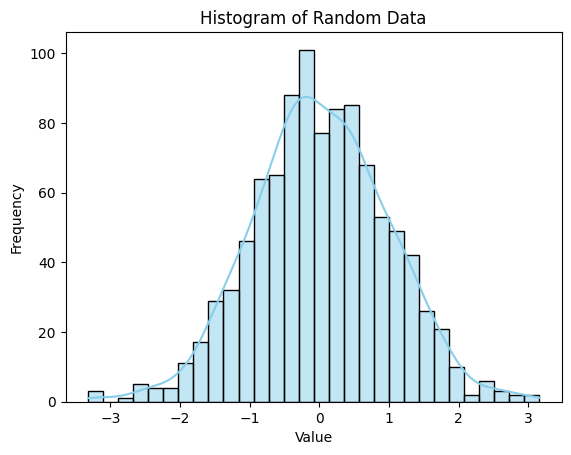

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data (e.g., normal distribution)
data = np.random.randn(1000)  # 1000 values from a standard normal distribution

# Create the histogram
sns.histplot(data, bins=30, kde=True, color='skyblue')

# Add titles and labels
plt.title("Histogram of Random Data")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Show the plot
plt.show()


Question 9: Use Pandas to load a CSV file and display its first 5 rows.


---




In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('your_file.csv')  # Replace 'your_file.csv' with the actual file path

# Display the first 5 rows
print(df.head())


Question 10: Calculate the correlation matrix using Seaborn and visualize it with a
heatmap.


---



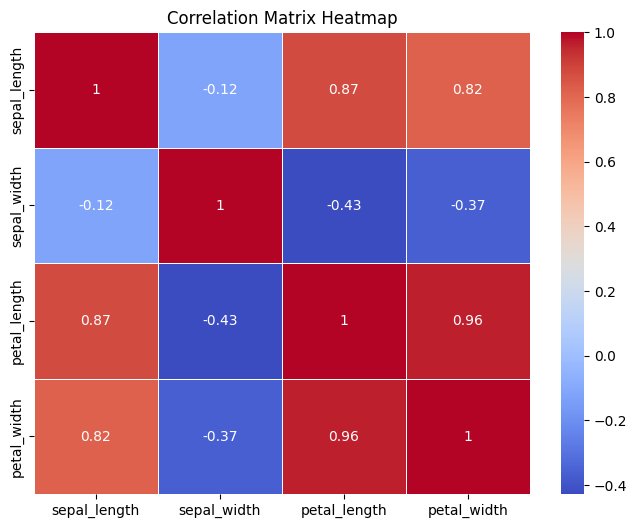

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load example dataset (you can also use your own CSV)
df = sns.load_dataset('iris')  # Replace with pd.read_csv('your_file.csv') for your data

# Calculate correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title("Correlation Matrix Heatmap")
plt.show()
